In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix

base = pd.read_csv('./restaurantev2.csv', sep=';', encoding='latin1')
base = base.drop('Exemplo', axis=1) # Remove a coluna Exemplo

In [26]:
base

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo,conc
0,Sim,Não,Não,Sim,Alguns,RRR,Não,Sim,Francês,0-10,Sim
1,Sim,Não,Não,Sim,Cheio,R,Não,Não,Tailandês,30-60,Não
2,Não,Sim,Não,Não,Alguns,R,Não,Não,Hamburger,0-10,Sim
3,Sim,Não,Sim,Sim,Cheio,R,Sim,Não,Tailandês,out/30,Sim
4,Sim,Não,Sim,Não,Cheio,RRR,Não,Sim,Francês,>60,Não
5,Não,Sim,Não,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,Sim
6,Não,Sim,Não,Não,Nenhum,R,Sim,Não,Hamburger,0-10,Não
7,Não,Não,Não,Sim,Alguns,RR,Sim,Sim,Tailandês,0-10,Sim
8,Não,Sim,Sim,Não,Cheio,R,Sim,Não,Hamburger,>60,Não
9,Sim,Sim,Sim,Sim,Cheio,RRR,Não,Sim,Italiano,out/30,Não


In [27]:
classe = base['conc']
entrada = base.drop('conc', axis=1)

In [28]:
entrada

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo
0,Sim,Não,Não,Sim,Alguns,RRR,Não,Sim,Francês,0-10
1,Sim,Não,Não,Sim,Cheio,R,Não,Não,Tailandês,30-60
2,Não,Sim,Não,Não,Alguns,R,Não,Não,Hamburger,0-10
3,Sim,Não,Sim,Sim,Cheio,R,Sim,Não,Tailandês,out/30
4,Sim,Não,Sim,Não,Cheio,RRR,Não,Sim,Francês,>60
5,Não,Sim,Não,Sim,Alguns,RR,Sim,Sim,Italiano,0-10
6,Não,Sim,Não,Não,Nenhum,R,Sim,Não,Hamburger,0-10
7,Não,Não,Não,Sim,Alguns,RR,Sim,Sim,Tailandês,0-10
8,Não,Sim,Sim,Não,Cheio,R,Sim,Não,Hamburger,>60
9,Sim,Sim,Sim,Sim,Cheio,RRR,Não,Sim,Italiano,out/30


In [29]:
classe

0     Sim
1     Não
2     Sim
3     Sim
4     Não
5     Sim
6     Não
7     Sim
8     Não
9     Não
10    Não
11    Sim
Name: conc, dtype: object

In [30]:
# Transforma os valores categóricos em numéricos
labelencoder = LabelEncoder()

colsToEncode = ['Alternativo','Bar', 'Sex/Sab','fome','Chuva','Res']

for coluna in colsToEncode:
    entrada[coluna] = labelencoder.fit_transform(entrada[coluna])

entrada['Cliente'] = entrada['Cliente'].replace('Nenhum', 0).replace('Alguns', 1).replace('Cheio', 2)
entrada['Preço'] = entrada['Preço'].replace('R', 0).replace('RR', 1).replace('RRR', 2)
entrada['Tempo'] = entrada['Tempo'].replace('0-10', 0).replace('30-60', 1).replace('out/30', 2).replace('>60', 3)

In [31]:
entrada

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo
0,1,0,0,1,1,2,0,1,Francês,0
1,1,0,0,1,2,0,0,0,Tailandês,1
2,0,1,0,0,1,0,0,0,Hamburger,0
3,1,0,1,1,2,0,1,0,Tailandês,2
4,1,0,1,0,2,2,0,1,Francês,3
5,0,1,0,1,1,1,1,1,Italiano,0
6,0,1,0,0,0,0,1,0,Hamburger,0
7,0,0,0,1,1,1,1,1,Tailandês,0
8,0,1,1,0,2,0,1,0,Hamburger,3
9,1,1,1,1,2,2,0,1,Italiano,2


In [32]:
colsToDummy = ['Tipo']

entrada = pd.get_dummies(entrada, columns=colsToDummy)

entrada

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tempo,Tipo_Francês,Tipo_Hamburger,Tipo_Italiano,Tipo_Tailandês
0,1,0,0,1,1,2,0,1,0,1,0,0,0
1,1,0,0,1,2,0,0,0,1,0,0,0,1
2,0,1,0,0,1,0,0,0,0,0,1,0,0
3,1,0,1,1,2,0,1,0,2,0,0,0,1
4,1,0,1,0,2,2,0,1,3,1,0,0,0
5,0,1,0,1,1,1,1,1,0,0,0,1,0
6,0,1,0,0,0,0,1,0,0,0,1,0,0
7,0,0,0,1,1,1,1,1,0,0,0,0,1
8,0,1,1,0,2,0,1,0,3,0,1,0,0
9,1,1,1,1,2,2,0,1,2,0,0,1,0


In [33]:
entradaValues = entrada.values

trainValues, testValues, trainAnswers, testAnswers = train_test_split(entradaValues, classe, test_size=0.2, random_state=0)

In [34]:
modelo = DecisionTreeClassifier(criterion='gini', random_state=0)
modelo.fit(trainValues, trainAnswers)

DecisionTreeClassifier(random_state=0)

In [35]:
previsto = modelo.predict(testValues)

previsto

array(['Não', 'Não', 'Não'], dtype=object)

0.6666666666666666

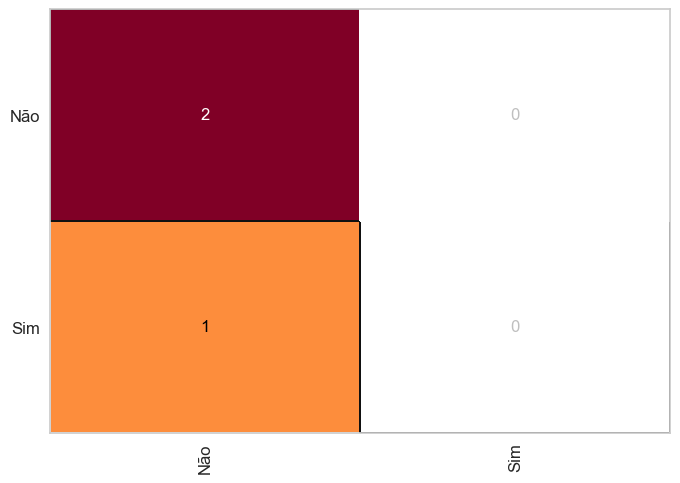

In [36]:
confusion = ConfusionMatrix(modelo)
confusion.fit(trainValues, trainAnswers)
confusion.score(testValues, testAnswers)

In [37]:
print(classification_report(testAnswers, previsto, zero_division=0))

              precision    recall  f1-score   support

         Não       0.67      1.00      0.80         2
         Sim       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



[Text(0.4444444444444444, 0.875, 'Tempo <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]\nclass = Sim'),
 Text(0.2222222222222222, 0.625, 'Cliente <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = Sim'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Não'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Sim'),
 Text(0.6666666666666666, 0.625, 'Chuva <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Não'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Não'),
 Text(0.7777777777777778, 0.375, 'Tempo <= 2.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Não'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Sim'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Não')]

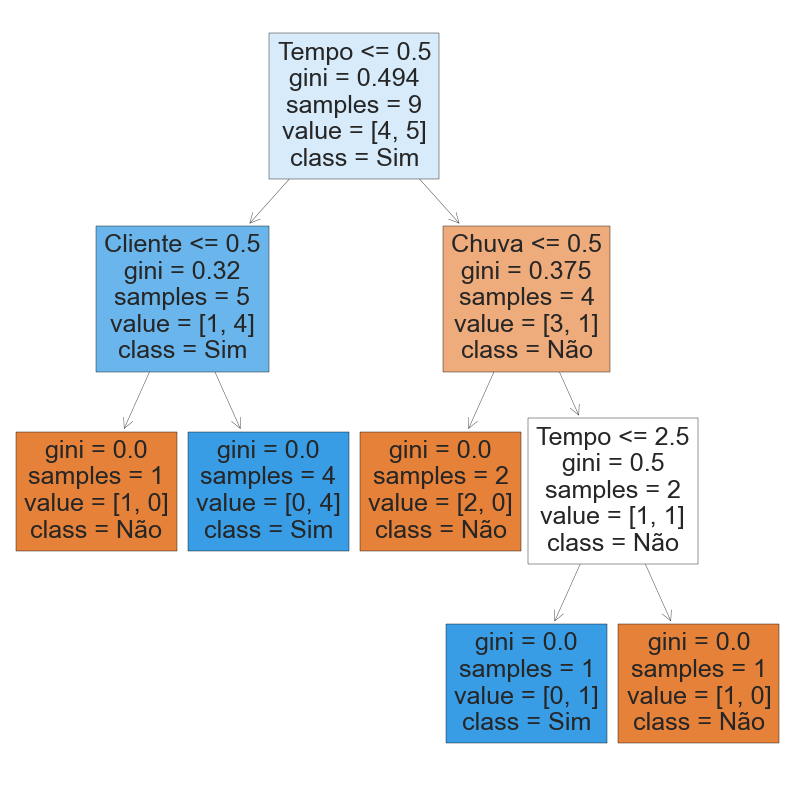

In [38]:
plt.subplots(figsize=(10, 10))
tree.plot_tree(modelo, filled=True, class_names=modelo.classes_, feature_names=entrada.columns)